# ARIMA

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.

In this tutorial, you will discover how to develop an ARIMA model for time series data with Python.

After completing this tutorial, you will know:

- About the ARIMA model the parameters used and assumptions made by the model.
- How to fit an ARIMA model to data and use it to make forecasts.
- How to configure the ARIMA model on your time series problem.

Autoregressive Integrated Moving Average Model
An ARIMA model is a class of statistical models for analyzing and forecasting time series data.

It explicitly caters to a suite of standard structures in time series data, and as such provides a simple yet powerful method for making skillful time series forecasts.

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a generalization of the simpler AutoRegressive Moving Average and adds the notion of integration.

This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

AR: Autoregression. A model that uses the dependent relationship between an observation and some number of lagged observations.

I: Integrated. The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.

MA: Moving Average. A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.
Each of these components are explicitly specified in the model as a parameter. A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

The parameters of the ARIMA model are defined as follows:

p: The number of lag observations included in the model, also called the lag order.

d: The number of times that the raw observations are differenced, also called the degree of differencing.

q: The size of the moving average window, also called the order of moving average.

A linear regression model is constructed including the specified number and type of terms, and the data is prepared by a degree of differencing in order to make it stationary, i.e. to remove trend and seasonal structures that negatively affect the regression model.

A value of 0 can be used for a parameter, which indicates to not use that element of the model. This way, the ARIMA model can be configured to perform the function of an ARMA model, and even a simple AR, I, or MA model.

Adopting an ARIMA model for a time series assumes that the underlying process that generated the observations is an ARIMA process. This may seem obvious, but helps to motivate the need to confirm the assumptions of the model in the raw observations and in the residual errors of forecasts from the model.

Next, let’s take a look at how we can use the ARIMA model in Python. We will start with loading a simple univariate time series.



## Plot

In [1]:
import numpy as np
from pandas import DataFrame
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
%matplotlib inline 

import io
import requests
from pandas.plotting import autocorrelation_plot

import matplotlib
matplotlib.rc('xtick', labelsize=40) 
matplotlib.rc('ytick', labelsize=40) 

import seaborn as sns
sns.set(style="whitegrid", color_codes=True)

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA

In [2]:
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

In [ ]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv"
s=requests.get(url).content
#c=pd.read_csv(io.StringIO(s.decode('utf-8')))
series = read_csv(io.StringIO(s.decode('utf-8')), header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


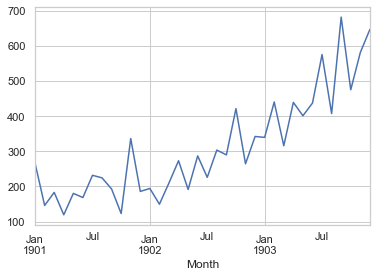

In [4]:
#series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

We can see that the Shampoo Sales dataset has a clear trend.

This suggests that the time series is not stationary and will require differencing to make it stationary, at least a difference order of 1.

Let’s also take a quick look at an autocorrelation plot of the time series. This is also built-in to Pandas. The example below plots the autocorrelation for a large number of lags in the time series.

## Autocorrelation situation

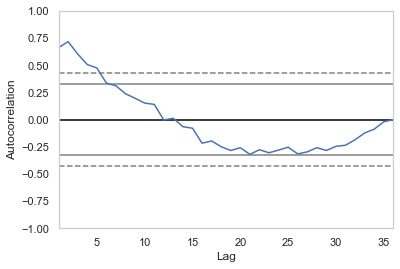

In [5]:
# use the build-in autocorrelation
autocorrelation_plot(series)

Running the example, we can see that there is a positive correlation with the first 10-to-12 lags that is perhaps significant for the first 5 lags.

A good starting point for the AR parameter of the model may be 5.

## other way pacf and acf

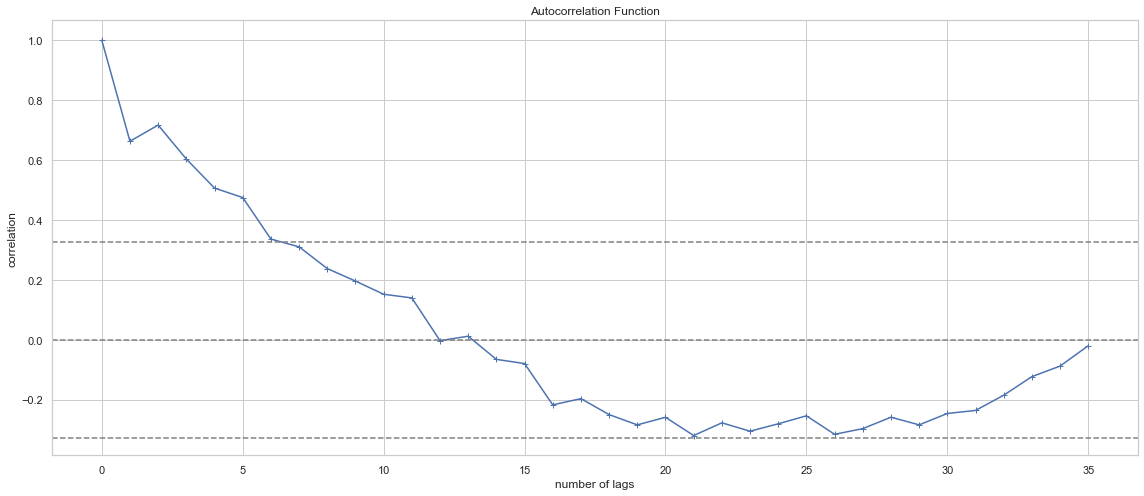

In [7]:
# acf
#calling auto correlation function
lag_acf = acf(series, nlags=300)
#Plot PACF:
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_acf,marker='+')
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/np.sqrt(len(series)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/np.sqrt(len(series)),linestyle='--',color='gray')
pyplot.title('Autocorrelation Function')
pyplot.xlabel('number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

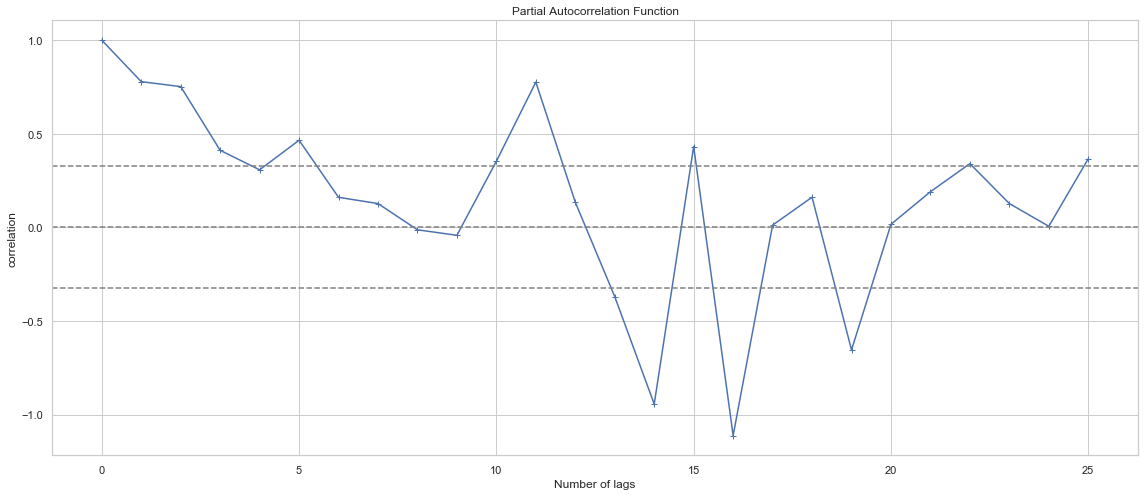

In [8]:
#pacf
#calling partial correlation function
lag_pacf = pacf(series, nlags=25, method='ols')
#Plot PACF:
pyplot.figure(figsize=(16, 7))
pyplot.plot(lag_pacf,marker='+')
pyplot.axhline(y=0,linestyle='--',color='gray')
pyplot.axhline(y=-1.96/np.sqrt(len(series)),linestyle='--',color='gray')
pyplot.axhline(y=1.96/np.sqrt(len(series)),linestyle='--',color='gray')
pyplot.title('Partial Autocorrelation Function')
pyplot.xlabel('Number of lags')
pyplot.ylabel('correlation')
pyplot.tight_layout()

- acf => 5 lags or 6 lags
- pacf => 4 lags

## Possible candidates

- ARIMA(5,1,0)
- ARIMA(0,1,4)
- ARIMA(5,1,4)

### ARIMA with Python

The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

1. Define the model by calling `ARIMA()` and passing in the p, d, and q parameters.
2. The model is prepared on the training data by calling the `fit()` function.
3. Predictions can be made by calling the `predict()` function and specifying the index of the time or times to be predicted.

Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

When fitting the model, a lot of debug information is provided about the fit of the linear regression model. We can turn this off by setting the disp argument to 0.

In [40]:
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
#model_fit.summary()
print(model_fit.summary())


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Tue, 05 Nov 2019   AIC                            406.340
Time:                        20:41:25   BIC                            417.227
Sample:                    02-01-1901   HQIC                           410.098
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.0649      3.652      3.304      0.001       4.908      19.222
ar.L1.D.Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.Sales    -0.6203      0.282     

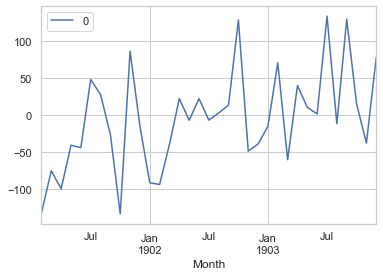

In [46]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

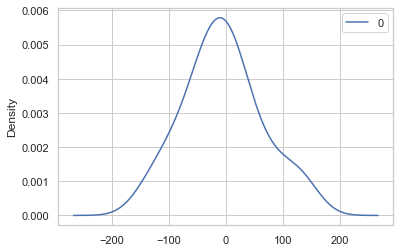

In [47]:
residuals.plot(kind='kde')
pyplot.show()

In [48]:
print(residuals.describe())

                0
count   35.000000
mean    -5.495251
std     68.132879
min   -133.296641
25%    -42.477926
50%     -7.186655
75%     24.748303
max    133.237953


### Candidate 2

In [10]:
# fit model
model = ARIMA(series, order=(0,1,4))
model_fit = model.fit(disp=0)
#model_fit.summary()
print(model_fit.summary())


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -195.583
Method:                       css-mle   S.D. of innovations             59.434
Date:                Wed, 06 Nov 2019   AIC                            403.166
Time:                        16:37:00   BIC                            412.498
Sample:                    02-01-1901   HQIC                           406.388
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8549      7.391      1.333      0.182      -4.630      24.340
ma.L1.D.Sales    -1.2375      0.270     -4.575      0.000      -1.768      -0.707
ma.L2.D.Sales     0.8512      0.293     

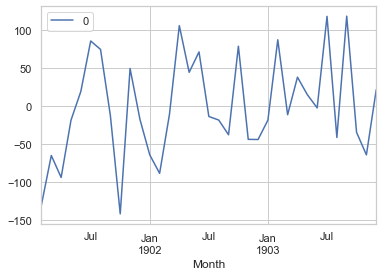

In [50]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

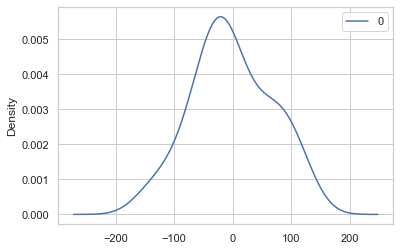

In [51]:
residuals.plot(kind='kde')
pyplot.show()

In [52]:
print(residuals.describe())

                0
count   35.000000
mean    -1.538979
std     67.214940
min   -141.841808
25%    -42.755423
50%    -12.750200
75%     46.623978
max    117.930887


### Candidate 3

In [53]:
# fit model
model = ARIMA(series, order=(5,1,4))
model_fit = model.fit(disp=0)
#model_fit.summary()
print(model_fit.summary())

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:160: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 4)   Log Likelihood                -191.341
Method:                       css-mle   S.D. of innovations             50.034
Date:                Tue, 05 Nov 2019   AIC                            404.681
Time:                        20:55:39   BIC                            421.790
Sample:                    02-01-1901   HQIC                           410.587
                         - 12-01-1903                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6032      4.020      2.887      0.004       3.725      19.481
ar.L1.D.Sales    -1.1499      0.280     -4.108      0.000      -1.698      -0.601
ar.L2.D.Sales    -1.3876      0.386     

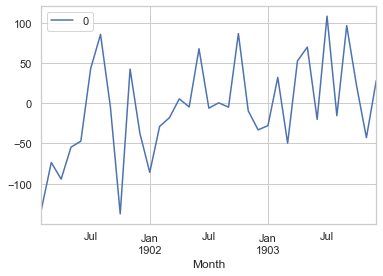

In [54]:
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

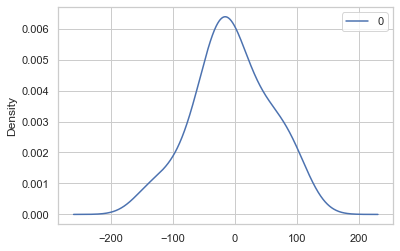

In [55]:
residuals.plot(kind='kde')
pyplot.show()

In [56]:
print(residuals.describe())

                0
count   35.000000
mean    -5.518061
std     60.768914
min   -137.529805
25%    -40.309409
50%     -6.270858
75%     37.097504
max    107.990010


## Rolling Forecast ARIMA Model

For this, you can read the rest of the tutorial in the link below:

- [arima](https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/)